# Part A - Coursework

     # ASSIGNMENT 2
            
     Amaya Ruth Syed - student no. 190805496

In [4]:
import pandas as pd
import numpy as np
import numpy.random as rn
import matplotlib.pyplot as plt

# Question 1 - Generating random numbers.

We construct functions for given probability distributions and sample random numbers from them. We then build a histogram with these samples and superimpose a dotted line corresponding to the pdf of the given functions. If our function is good, we will see that the histogram follows the shape of that line. [1]

In [5]:
# first we define a function to build the histograms from the samples we will obtain.
def build_historgram(sample, pdf, n_bins, first_bin, last_bin, mod, space, title=None):
    
    plt.figure(figsize=(12,8))
    bins = np.linspace(first_bin, last_bin, n_bins*mod)
    x_grid = np.linspace(first_bin - space , last_bin + space, n_bins*20+1)
    plt.hist(sample, bins=bins, density=1, facecolor='xkcd:blue', alpha=0.75, label='sampling')
    
    if pdf is not None:    
        
        plt.plot(x_grid, pdf(x_grid), 'r--', label= 'pdf')
        plt.xlabel("x", fontweight='bold')
        plt.ylabel('Probability density', fontweight='bold')
        plt.legend(loc = 'best')
    
    if title is not None:
        plt.title(title)
        
        
    plt.show()

a) First, we define a function for the uniform distribution over the interval [ $-2 \pi, \pi$]

In [6]:
# we define the uniform distribution for in (-2PI, PI).
def uniform_a(N=1):
    
    return [3 * np.pi * (rn.random()-2/3) for i in range(N)]

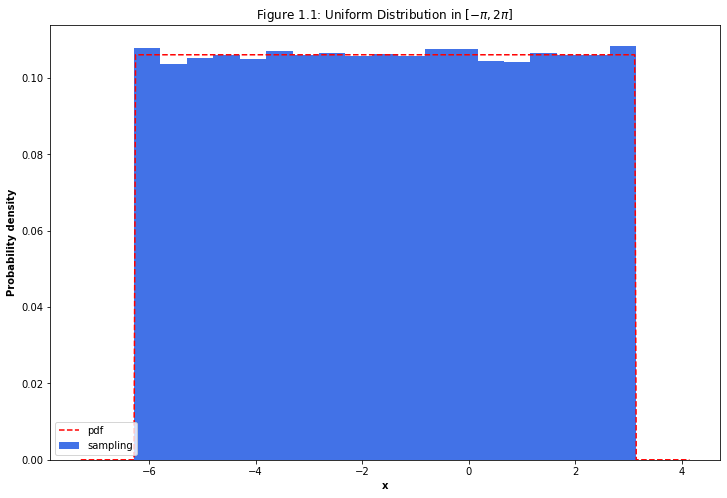

In blue we see the distribution obtained from randomly sampling our uniform distribution between [-2pi, pi] function 10000000 times. The red dotted line corresponds to the pdf of the uniform distribution


In [10]:
# we obtain samples from our uniforn_a distribution function
sample = uniform_a(100000)

# we define the pdf for the uniform distribution between (-2PI,2PI)
def uniform_a_PDF(x):
    
    return 1/(3 * np.pi) * np.heaviside(x+2 * np.pi, 1) * np.heaviside(-x+np.pi, 1)
    
build_historgram(sample, uniform_a_PDF, 20, -2*np.pi, np.pi, 1, 1,title='Figure 1.1: Uniform Distribution in $[-\pi, 2\pi]$')

print('In blue we see the distribution obtained from randomly sampling our uniform distribution between [-2pi, pi] function 10000000 times. The red dotted line corresponds to the pdf of the uniform distribution')

We observe that the histogram built from the sampling of our function uniform_a follows the shape of the dotted line. There is some fluctuation, which we could lower even more by making a histogram with larger sampling. 

b) We now define a uniform distribution function over the union of the three intervals $[1, 2] \cup [3, 4] \cup [5, 6]$ which we will sample.

In [11]:
# we define the uniform distribution in [1,2]U[3,4]U[5,6]
def uniform_b(N=1):
    
    return [(1 + rn.randint(0,3) * 2 + rn.random()) for i in range(N)]


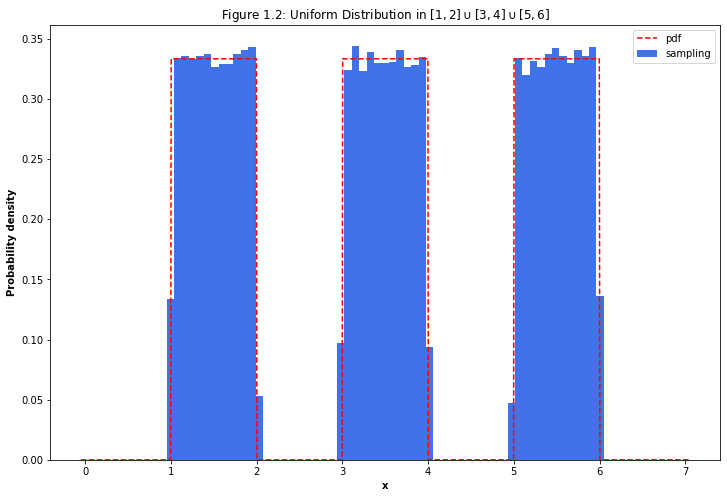

In blue we see the distribution obtained from randomly sampling our uniform distribution for the union of three intervales: [1, 2], [4, 4], [5, 6] 10000000 times. The red dotted line corresponds to the pdf of the uniform distribution


In [15]:
# we obtain our samples from that uniform_b distribution function
sample = uniform_b(100000)
                   
def uniform_b_PDF(x):
    
    return 1/3 * (np.heaviside(x-1, 1) * np.heaviside(-x+2, 1) + np.heaviside(x-3, 1) * np.heaviside(-x+4, 1) + np.heaviside(x-5, 1) * np.heaviside(-x+6, 1))

build_historgram(sample,uniform_b_PDF, 60, 0.95, 6.05, 1, 1, title='Figure 1.2: Uniform Distribution in $[1, 2] \cup [3, 4] \cup [5, 6]$')

print('In blue we see the distribution obtained from randomly sampling our uniform distribution for the union of three intervales: [1, 2], [4, 4], [5, 6] 10000000 times. The red dotted line corresponds to the pdf of the uniform distribution')

c) Gaussian distribution with a given mean value $\mu = 12.5$ and variance $\sigma^2 = 9$ obtained using the Box-Mueller method.

In [16]:
# get Normal distribution N-sample with mu and sigma using Box-Muller method
def BM_normal(mu, sigma, N=2):
    
    result = []
    
    for i in range(N//2 + N%2):
        
        u1,u2 = rn.random(2)
    
        z1 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
        z2 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
        
        normal_rns = mu + z1 * sigma, mu + z2 * sigma
        for num in normal_rns:
            result.append(num)
        
    if (N%2==1):
        
        result.pop()

    return np.array(result)

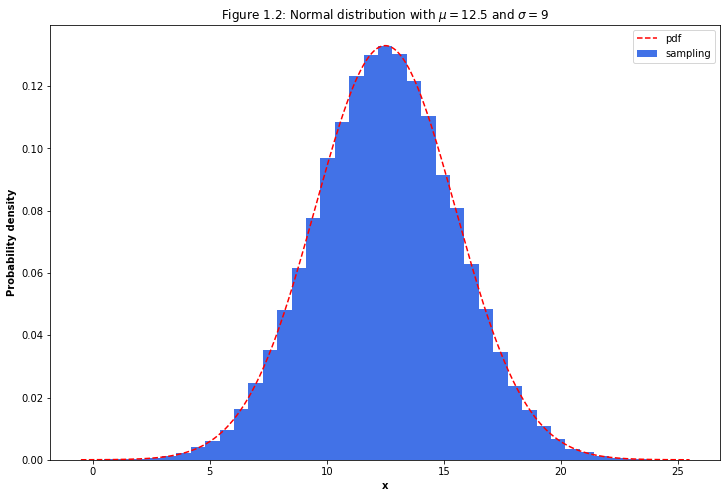

: In blue we see the distribution obtained from randomly sampling our normal distribution function with mean= 12.5 and variance= 9, 100000 times. The red dotted line corresponds to the pdf of the normal distribution with same mean and variance


In [17]:
def normalPDF(mu, sigma, x):
    
    return ((sigma * np.sqrt(2 * np.pi))**-1 ) * np.exp(-0.5 * ((x-mu)/sigma)**2)

sample = BM_normal(12.5, 3, 100000)

def normal(x):
    return normalPDF(12.5, 3, x)

build_historgram(sample,normal,40,0.5,24.5, 1, 1,title='Figure 1.2: Normal distribution with $\mu = 12.5$ and $\sigma=9$')

print(': In blue we see the distribution obtained from randomly sampling our normal distribution function with mean= 12.5 and variance= 9, 100000 times. The red dotted line corresponds to the pdf of the normal distribution with same mean and variance')

d) Exponential distribution, with $\lambda = 0.7, 1.5$ and $3.5$ respectively. To sample an exponencial distribution we can use the inverse function method. For the PDF $f(x)=\lambda e^{-\lambda x}$ we have the CDF $F(x)$

$\begin{aligned} F(x) &=\int_{0}^{x} f(t) d t =\lambda \int_{0}^{x} e^{-\lambda t} d t =-\left.e^{-\lambda t}\right|_{0} ^{x}=1-e^{-\lambda x}\\\\ F^{-1}(u)&=-\frac{1}{\lambda} \log (1-u) \end{aligned}$

$F^{-1}(u)$ will have density $f(x)$ if $u$ is a random variable with uniform distribution.


In [18]:
def exp_rnd(a=1,N=None):    
    return np.array([(-np.log(1-rn.random()) / a) for i in range(N)]) 


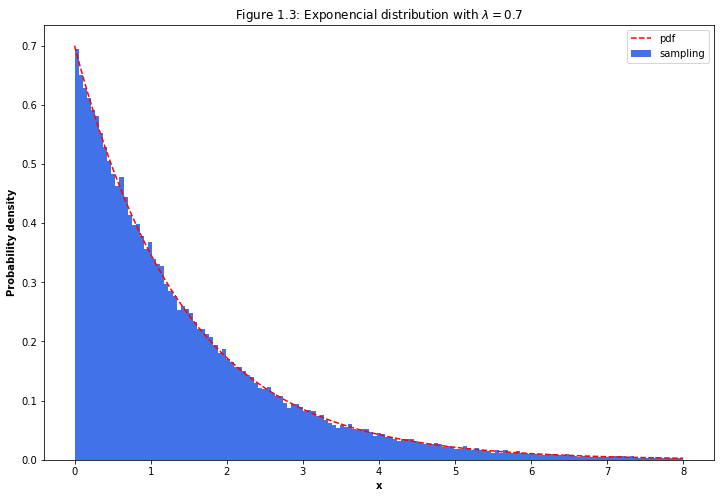

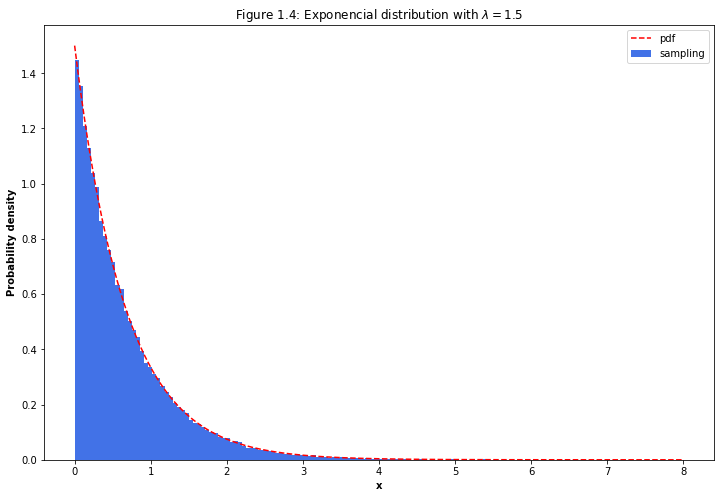

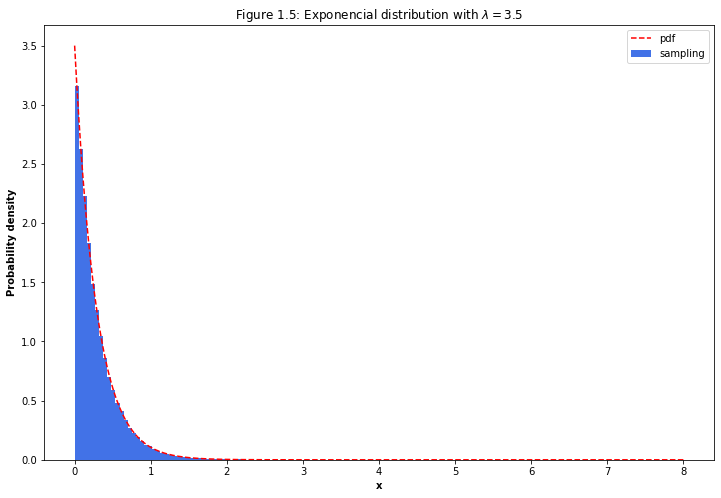

In blue we see the distribution obtained from randomly sampling our exponential distribution function with, from top to bottom, lmbda = 0.7, 1.5 and 3.5, with 100000 samples. The red dotted line corresponds to the pdf of the corresponding exponential distribution


In [19]:
def exp07(x):
    return 0.7*np.exp(-0.7*x)
def exp15(x):
    return 1.5*np.exp(-1.5*x)
def exp35(x):
    return 3.5*np.exp(-3.5*x)
    

sample = exp_rnd(0.7,100000)
build_historgram(sample,exp07,30,0,8, 5, 0, title='Figure 1.3: Exponencial distribution with $\lambda=0.7$')
sample = exp_rnd(1.5,100000)
build_historgram(sample,exp15,30,0,8, 5, 0, title='Figure 1.4: Exponencial distribution with $\lambda=1.5$')
sample = exp_rnd(3.5,100000)
build_historgram(sample,exp35,30,0,8, 5, 0, title='Figure 1.5: Exponencial distribution with $\lambda=3.5$')

print('In blue we see the distribution obtained from randomly sampling our exponential distribution function with, from top to bottom, lmbda = 0.7, 1.5 and 3.5, with 100000 samples. The red dotted line corresponds to the pdf of the corresponding exponential distribution')

(e) Continuous distribution with cumulative density function:

\begin{equation*}
F(x) = \dfrac{1}{6} (x^2 + x)
\end{equation*}

or equivalently, with probability density function


\begin{equation*}
F'(x) = f(x) = \dfrac{1}{6} (2x + 1)
\end{equation*}.

in this case inverting $F(x)$ we have
\begin{equation*}
F^{-1}(u) = \left(\left(6u + \frac{1}{4}\right) -\frac{1}{2}\right)^{\frac{1}{2}}
\end{equation*}

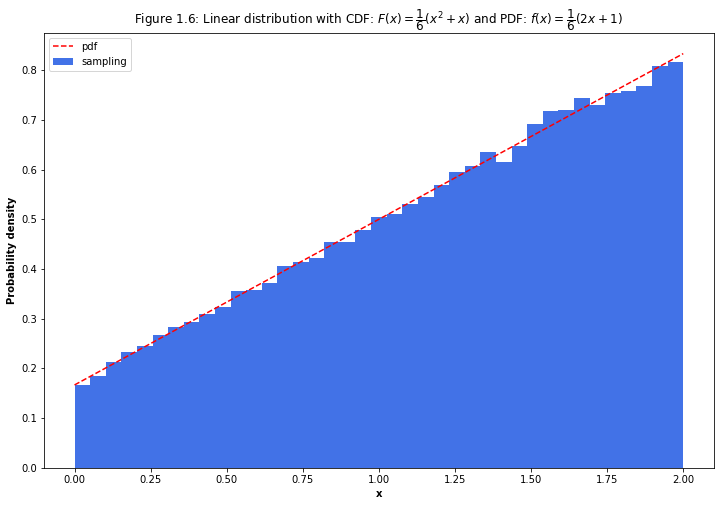

In blue we see the distribution obtained from randomly sampling our linear density distribution with 100000 samples. The red dotted line corresponds to the pdf of the corresponding linear distribution


In [20]:
def linearPDF(x):
    
    return 1/3*x + 1/6

def quad_D(N):
    return np.array([(np.sqrt(6 * rn.random() + .25) - .5) for i in range(N)])

sample = quad_D(100000)
0
build_historgram(sample, linearPDF, 20, 0, 2, 2, 0, 'Figure 1.6: Linear distribution with CDF: $F(x) = \dfrac{1}{6} (x^2 + x)$ and PDF: $f(x) = \dfrac{1}{6} (2x + 1)$ ')

print('In blue we see the distribution obtained from randomly sampling our linear density distribution with 100000 samples. The red dotted line corresponds to the pdf of the corresponding linear distribution')

# Question 2 - Acceptance-Rejection Sampling.

We will sample random variables from the following probability density function, using Acceptance-Rejection sampling:
    
\begin{equation*}
f(x) = \frac{1}{1000}(100 + \frac{1}{5}x^3 - 6x^2)
\end{equation*}
 
 with x $\in [0, 10]$. To do this we must find a function $g(x)$ such that $g(x) \geq f(x) \forall x \in [0, 10]$ and we are able to draw random sample from $g(x) / A $ where A is $A = \int_{0}^{10} g(x)dx $.
 
 We define our rejection_sampling algorithm, as well as the function distributed as $f(x)$ [2]

a) First we will use $g_0(x) = 3$  $\forall x \in [0, 10]$ as the threshold for our acceptance-rejection sampling of the random number generating function f_pdf distributed according to $f(x)$

In [23]:
def rejection_sampling2(f, g, g_rng, N, reportAcceptanceRate=False):
    
    result=[]
    iters = 0
    
    while (len(result) < N):
        
        iters += 1
        y = g_rng()
        u = rn.random()
        if (u < f(y) / ( g(y))):
            result.append(y)
            
    if reportAcceptanceRate:  
        
        return np.array(result), (N/iters)
    
    else:
        
        return np.array(result)

# The desired f(x) PDF  
        
def f_pdf(x):
    
    return 1/1000*(100+4/5*x**3-6*x**2)

b) We build the histogram for

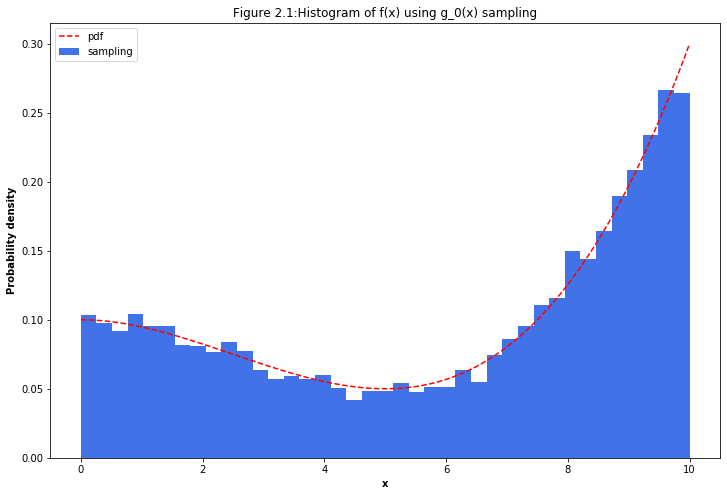

Acceptance ratio: 0.3292723081988805


In [25]:
# g(x) constant = 0.3
def g_0(x):
    return  0.3

def g_0_pdf(x): #this is the normalized pdf.
    return  g_0(x) * 1/3

def g_0_rn():
    return  10 * rn.random()

def g_0_sample(N):
    return np.array([g_0_rn() for i in range(N)])

sample = g_0_sample(1000000)

sample, rate = rejection_sampling2(f_pdf, g_0, g_0_rn, 10000, True)

build_historgram(sample, f_pdf, 20, 0, 10, 2, 0, 'Figure 2.1:Histogram of f(x) using g_0(x) sampling' )
print("Acceptance ratio:", rate)

We see that histogram reproduces the desired distribution, although only $1/3$ of the samples are accepted and the rest discarded. This was expected since $A_{g_0}=\int_{0}^{10} g(t) d t = 3$ and $A_{g_0}^{-1}$ is the acceptance yield of the algorithm.
We could improve this by taking a linear function as $g(x)$. We can use $g_1(x) = 0.1 + 0.02x$ which also verifies $g_1(x) \geq f(x)$

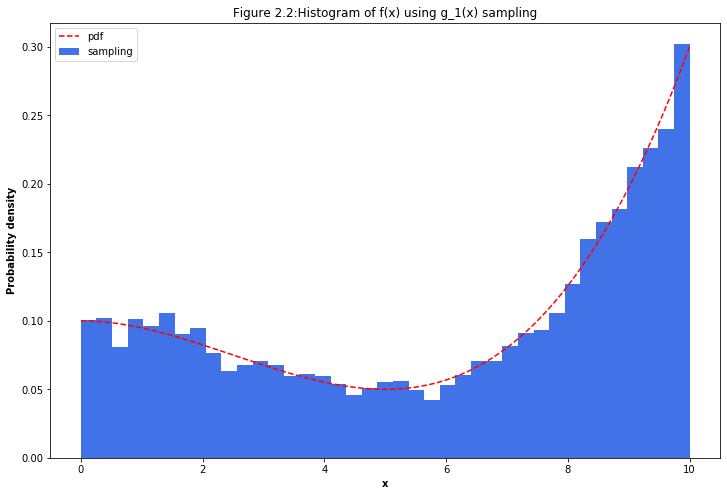

Acceptance ratio: 0.4974876871797423


In [26]:

def g_1(x):
    return 0.1 + 0.02 * x

def g_1_rn():
    return np.sqrt(200 * rn.random() + 25) - 5    

def g_1_pdf(x):
    return 1/2 * (0.1 + 0.02 * x)


def g_1_sample(N):
    return np.array([g_1_rn() for i in range(N)])
    

#sample = g_1_sample(10000)
sample, rate = rejection_sampling2(f_pdf, g_1, g_1_rn, 10000, True)

build_historgram(sample, f_pdf, 20, 0, 10, 2, 0, 'Figure 2.2: Histogram of f(x) using g_1(x) sampling') 
print("Acceptance ratio:", rate)

in this case we get the desired distribution with an acceptance of $\simeq 1/2$.

c) Then we are asked to sample using a quadratic of the form

\begin{equation*}
g_2(x) = a + b(x-5).
\end{equation*}


As we can see in plot below the best function of this form we find that verifies $g(x) \geq f(x)$ is

\begin{equation*}
g_2(x) = \frac{1}{20} + \frac{1}{100}(x-5)^2
\end{equation*}

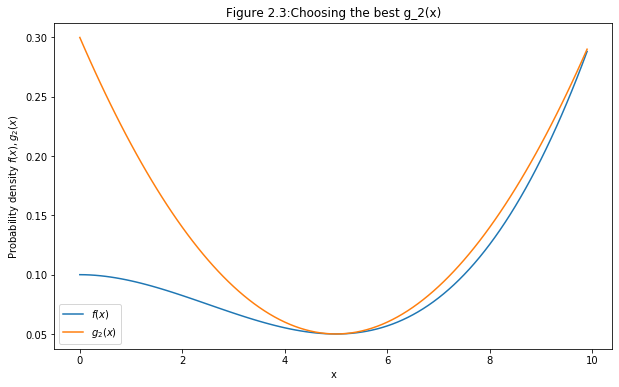

In [30]:
x = np.arange(0, 10, 0.1)
g2= lambda x:0.05 + 0.01 * (x-5)**2

plt.figure(figsize=(10,6))
plt.plot(x,f_pdf(x), label='$f(x)$' )
plt.plot(x, g2(x), label='$g_2(x)$')
plt.xlabel('x')
plt.ylabel('Probability density $f(x), g_2(x)$')
plt.title('Figure 2.3:Choosing the best g_2(x)')
plt.legend()            
plt.show()



Then we get its normalized CDF (using $A_{g_2}=4/3$), 

\begin{equation*}
G(x) = \frac{5}{16} + \frac{3}{80}x + \frac{1}{400}(x - 5)^3.
\end{equation*}

We need the inverse of this CDF to be able to sample with distribution 

\begin{equation*}
\frac{g(x)}{A}
\end{equation*}


We do that by solving for $x$ the following cubic equation: 

\begin{equation*}
\frac{5}{16} - y + \frac{3}{80}x + \frac{1}{400}(x-5)^3 = 0 
\end{equation*}

and taking the relevant root which is given by (after associating $y \rightarrow u $ and $x \rightarrow G^{-1} $)
\begin{equation*}
G^{-1}(u)=\sqrt[3]{5} \sqrt[3]{\sqrt{5} \sqrt{320 u^2-320 u+81}+40 u-20}-\frac{5^{2/3}}{\sqrt[3]{\sqrt{5}
   \sqrt{320 u^2-320 u+81}+40 u-20}}+5
\end{equation*}

In [32]:
def quadratic_sample(N):
    
    result=[]
    for i in range(N):
        x = rn.random() 
        h = (-20 + 40 * x + np.sqrt(5) * np.sqrt(81+320*(x-1)*x))**(1/3)
        z = 5 - 25**(1/3) / h + 5**(1/3) * h
        result.append(z)
        
    return np.array(result)


def quadratic_rn():
    
    x = rn.random() 
    h = (-20 + 40 * x + np.sqrt(5) * np.sqrt(81+320*(x-1)*x))**(1/3)
    z = 5 - 25**(1/3) / h + 5**(1/3) * h
    return z

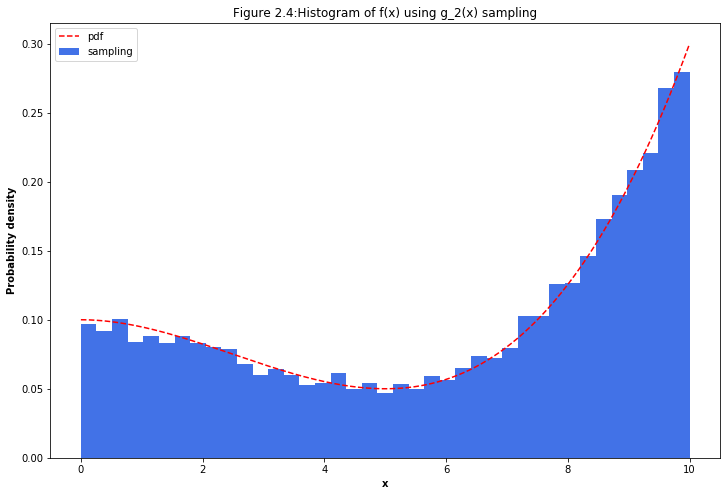

Acceptance ratio: 0.7486711087819121


In [33]:
def g_2(x):
    return 1/20 + 1/100*(x-5)**2

def g_2_pdf(x):
    return 3/80 + 3/400*(x-5)**2

#sample = quadratic_sample(10000)

#build_historgram(sample, g_2_pdf, 20, 0, 10, 2, 0)

sample, rate = rejection_sampling2(f_pdf, g_2, quadratic_rn, 10000, True)

build_historgram(sample, f_pdf, 20, 0, 10, 2, 0, 'Figure 2.4:Histogram of f(x) using g_2(x) sampling')
print("Acceptance ratio:", rate)

As expected, using $g_2(x)$ we enhance the method to an acceptance yield of $3/4$.

# Question 3 - Importance sampling.

We consider the integral
\begin{equation*}
I=\int_{0}^{1} x^{3}(1-x)^{1 / 2} \mathrm{d} x=\frac{32}{315}
\end{equation*}

a) To estimate the integral with uniform variates we use

\begin{equation*}
I \simeq \frac{(b-a)}{N} \sum_{i=1}^{N} f\left(x_{i}\right)
\end{equation*}

with standard error
\begin{equation}
\frac{(b-a)}{\sqrt{N}} \sqrt{\frac{1}{N-1} \sum_{i=1}^{N}\left(f(x_{i})-\langle\tilde{f}(x)\rangle\right)^{2}}
\end{equation}
 
where $\langle\tilde{f}(x)\rangle=\frac{1}{N} \sum_{i=1}^{N} f\left(x_{i}\right)$ [3]

In [34]:
f3 = lambda x: x**3 * np.sqrt(1-x)

def MCIntUniform(f,N,xmin,xmax):
    
    sum = 0
    for i in range(N):
        L = xmax-xmin
        x = L * rn.random()     
        sum += f(x)
    
    return L * sum / N


def MCIntUniformWithError(f,N,xmin,xmax):
    
    L = xmax-xmin
    uniform_sample = rn.random(N) * L + xmin
    f_sample = np.array([f(x) for x in uniform_sample])
    mean = f_sample.mean()
    integral = mean * L
    error = L * np.sqrt(1/(N*(N-1)) * ((f_sample-mean)**2).sum() )  
    return integral,error



We obtain the result below and we compare it with the exact value:

In [35]:
result,error = MCIntUniformWithError(f3,1000,0,1)
print('MC Result:',result, 'std error:',error, 'absolute error:',(result-32/315) )

MC Result: 0.102976400589281 std error: 0.002787897357142834 absolute error: 0.0013890990019794075


b) to estimate integrals with importance sampling we will implemente the expression
\begin{equation*}
I_{IS}=\frac{1}{N} \sum_{i=1}^{N} \frac{f(x)}{p(x)}
\end{equation*}
and for the standard error we have
\begin{equation}
\sigma_{I S} \propto \sqrt{\frac{\operatorname{Var}\left[\frac{f(x)}{p(x)}\right]_{p(x)}}{N}}
\end{equation}

In [36]:

def MCIntImportanceWithError(f,N,rand_gen,pdf,xmin,xmax):
    
    L = xmax-xmin
    importance_sample = [rand_gen() for i in range(N)]
    weighted_f_sample = np.array([(f(x)/pdf(x)) for x in importance_sample])
    mean = weighted_f_sample.mean()
    integral = mean * L
    error = L * np.sqrt(1/(N*(N-1)) * ((weighted_f_sample-mean)**2).sum() )  
    return integral,error

So $f_0(x) = 5x^4$ we can integrate and invert, obtaining $F_0^{-1}(u) = u^{1/5}$. Sampling $F_0^{-1}(u)$ we will obtain the desired distribution to apply importance sampling.

In [37]:
f_0_rn= lambda: rn.random()**(.2)
f_0_pdf = lambda x: 5*x**4

result,error = MCIntImportanceWithError(f3,1000,f_0_rn,f_0_pdf,0,1)
print('MC Result:',result, 'std error:',error, 'absolute error:',(result-32/315) )

MC Result: 0.09944834727943513 std error: 0.0024792230796310704 absolute error: -0.002138954307866453


We see that the estimate slightly improves the uniform variate resuk, reducing by $\simeq 10\%$ the standard error.

c) Now we proceed analogously for $f_{1}(x)=4 x^{3}$, $f_{2}(x)=3 x^{2}$, $f_{3}(x)=2 x$ which correspond to $F_1^{-1}(u) = u^{1/4}$, $F_2^{-1}(u) = u^{1/3}$, $F_3^{-1}(u) = u^{1/2}$.



In [38]:


f_1_rn= lambda: rn.random()**(.25)
f_1_pdf = lambda x: 4*x**3

f_2_rn= lambda: rn.random()**(1/3)
f_2_pdf = lambda x: 3*x**2

f_3_rn= lambda: rn.random()**(.5)
f_3_pdf = lambda x: 2*x

result,error = MCIntImportanceWithError(f3,1000,f_1_rn,f_1_pdf,0,1)
print('MC Result:',result, 'std error:',error, 'absolute error:',(result-32/315) )
result,error = MCIntImportanceWithError(f3,1000,f_2_rn,f_2_pdf,0,1)
print('MC Result:',result, 'std error:',error, 'absolute error:',(result-32/315) )
result,error = MCIntImportanceWithError(f3,1000,f_3_rn,f_3_pdf,0,1)
print('MC Result:',result, 'std error:',error, 'absolute error:',(result-32/315) )


MC Result: 0.09952308978343422 std error: 0.001553553414234265 absolute error: -0.002064211803867372
MC Result: 0.10160421753884986 std error: 0.0008642549417348454 absolute error: 1.6915951548276964e-05
MC Result: 0.10213915924368404 std error: 0.0012422034968984368 absolute error: 0.0005518576563824512


Using importance sampling with this set of function we obtain better estimates, which show a smaller standard error. We get the best results for $f_{2}(x)=3 x^{2}$ yielding a $67\%$ reduction in the standard error , followed by  $f_{3}(x)=2x$ with a $54\%$ reduction. To understand better the performance of each sampling we can plot the different proposed distributions and compare them with the function whose integral we are want to estimate (properly normalized to 1 in $[0,1]$).

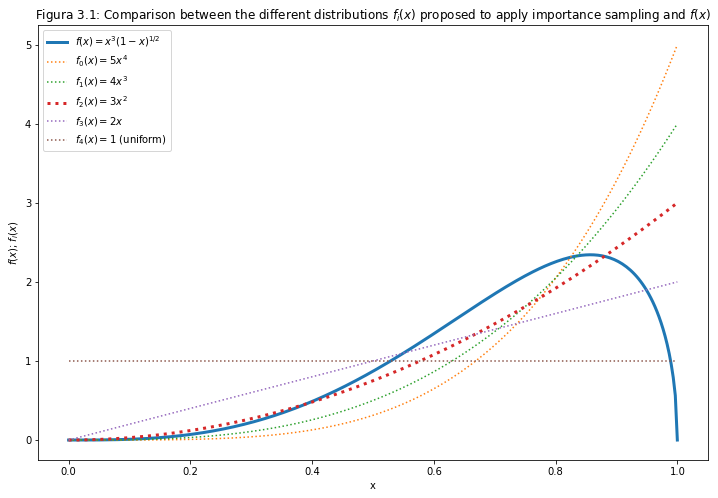

In [39]:

I=32/315

plt.figure(figsize=(12,8))
x=np.linspace(0,1,300)

plt.plot(x,f3(x)/I,linewidth=3 ,label='$f(x) = x^{3}(1-x)^{1 / 2}$')
plt.plot(x,5*x**4,linestyle="dotted",label='$f_0(x) = 5x^{4}$')
plt.plot(x,4*x**3,linestyle="dotted",label='$f_1(x) = 4x^{3}$')
plt.plot(x,3*x**2,linestyle="dotted",linewidth=3 ,label='$f_2(x) = 3x^{2}$')
plt.plot(x,2*x,linestyle="dotted",label='$f_3(x) = 2x$')
plt.plot(x,(1+x*0),linestyle="dotted",label='$f_4(x) = 1$ (uniform)')
plt.xlabel('x')
plt.ylabel('$f(x)$; $f_i(x)$')
plt.legend()
plt.title('Figura 3.1: Comparison between the different distributions $f_i(x)$ proposed to apply importance sampling and $f(x)$')
plt.show()


We can see that $f_3(x)= 3x^2$ approximates better the shape of the function being integrated in most of the interval considered leading to a smaller mean squared difference, so it is reasonable that it shows the best performance within the proposed functions.

# Question 4 - Simple and biased random walks.

We shall work first with a Bernoulli random walk defined by
$$
X_{i+1}=X_{i}+Y
$$

where $Y$ is the jump variable such that $P(Y=1)=1 / 2, P(Y=-1)=1 / 2$. We first write functions to generate $N$ ubiased Bernoulli random walks [4]:

In [41]:
def bernoulliRW(steps, step_size,x_0=0):
    walk = [x_0]
    tosses = rn.randint(0,2,steps) * 2 * step_size - step_size 
    for toss in tosses:
        walk.append(walk[-1] + toss)
     
    return np.array(walk)

def generateRWs(n_walks, steps, step_size, x_0=0):
    return [bernoulliRW(steps, step_size, x_0) for i in range(n_walks)]  

a)
i) We generate 100 100-step random walks and plot the first 10

Text(0.5, 1.0, 'Figure 4.1: 10 Random Walks ($n = 100$ steps)')

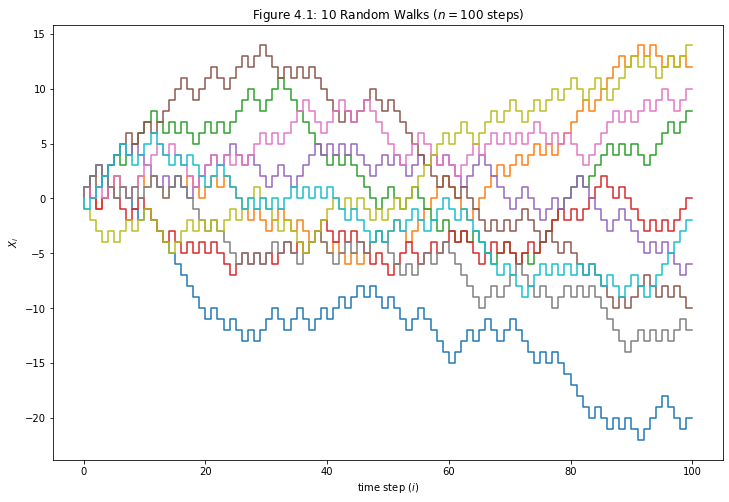

In [42]:
walks = generateRWs(100, 100, 1, x_0=0)

first10walks = walks[0:10]

plt.figure(figsize=(12,8))
for walk in first10walks:
    #plt.figure(figsize=(12,8))
    plt.step(range(101),walk)

plt.xlabel("time step ($i$)")
plt.ylabel('$X_i$')
#plt.legend(loc = 'best')
plt.title("Figure 4.1: 10 Random Walks ($n = 100$ steps)")

ii and iii) We now want to generate a histogram of the position reached at time $i = 5$ and $i = 5$ of 100 sample paths
and compare with the corresponding binomial distribution. The relevant binomial is given by:

$$
P(x, N)=\left(\begin{array}{c}
{N} \\
{\frac{x+N}{2}}
\end{array}\right) p^{\frac{N+x}{2}}(1-p)^{\frac{N-x}{2}}
$$
where $P(x, N)$ is the probability that the random walk is found at position $x$ after $N$ steps. We'll implement functions to represent this binomial distribution, to collect samples of the position $X_i$ at a given time step $i$ and also to build the required histograms. It is worth noting that a walk of N steps will always finish in an odd(even) position after an odd(even) number of steps.

In [43]:
#we collect a sample of size 'n_walks' of the terminal position after N steps with initial position x_0.

def final_pos_sampleRW(n_walks, steps, step_size, x_0=0):
    
    result=[]
    for i in range(n_walks):
        result.append(bernoulliRW(steps,step_size,x_0)[-1])
    
    return np.array(result)

#we build our own 'n choose k' function

def comb(n, k):
 
  if k < 0 or k > n:
    return None
  x = 1
  for i in range(min(k, n - k)):
    x = x*(n - i)//(i + 1)
  return x

#We implement the binomial shown above, adjusted by the ´parity´condition just mentioned

def BinomialRW(steps,position,p):
    
    if (steps%2 != position%2): # zero probability of an odd(even) position after an even(odd) number of steps.(valid for x_0=0)
        return 0
    return comb(steps, (position + steps) // 2) * p**((position + steps) // 2) * (1-p)**((steps - position) // 2)

#we build a histogram with the posibility of including the relevant mass probability function

def build_historgram_RW(sample, mpf, first_bin, last_bin, bin_size, title=None):
    
    plt.figure(figsize=(12,8))
    bins = np.arange(first_bin-0.5, last_bin + 1.5, bin_size) 
    plt.hist(sample, bins=bins,density=1, facecolor='blue', alpha=0.75, label='Sampling')
    
    if mpf is not None:
        intBins = [bin for bin in range(first_bin, last_bin + 1, bin_size)]
        probs = [mpf(i) for i in intBins]

        toDel = []
        for i in range(len(intBins)):
            if probs[i]==0:
                toDel.append(i)
        nonZeroProbs = [i for j, i in enumerate(probs) if j not in toDel]
        nonZeroBins = [i for j, i in enumerate(intBins) if j not in toDel]
         
          
        plt.scatter(nonZeroBins, nonZeroProbs, color='red',  label='Binomial')
        plt.xlabel("x", fontweight='bold')
        plt.ylabel('Frequency', fontweight='bold')
        plt.title(title)
        plt.legend(loc = 'best')
        
    plt.show()


We now have all we need to build the histograms:

Figure 4.2 : Histogram of position X after 20 time steps. p= 0.5, n = 100


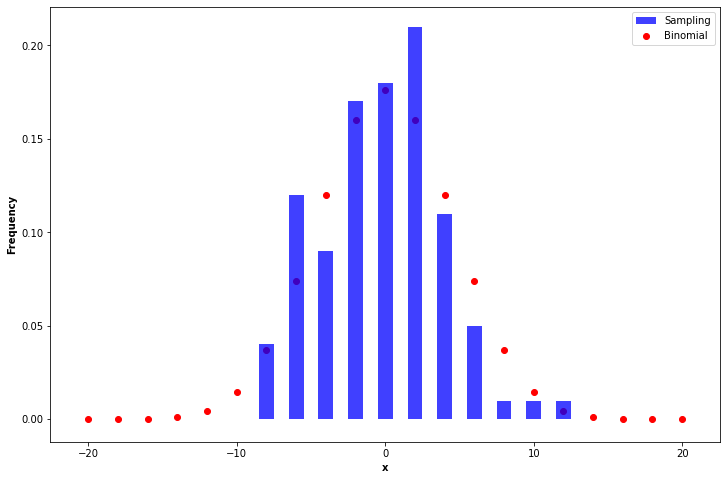

Figure 4.3: Histogram of position X after 5 time steps. p= 0.5, n = 100 


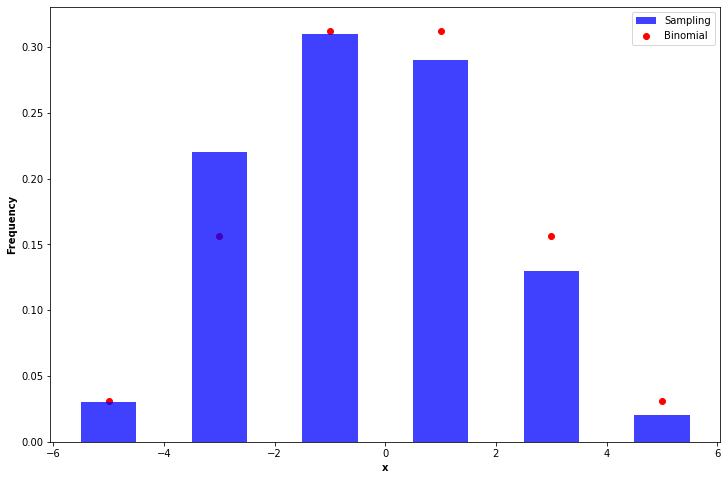

In [45]:

def BinomialRW05(x):
    return BinomialRW(5,x,0.5)
    
def BinomialRW20(x):
    return BinomialRW(20,x,0.5)

print('Figure 4.2 : Histogram of position X after 20 time steps. p= 0.5, n = 100')
sample = final_pos_sampleRW(100, 20, 1, x_0=0)
build_historgram_RW(sample, BinomialRW20, -20, 20, 1)

print('Figure 4.3: Histogram of position X after 5 time steps. p= 0.5, n = 100 ')
sample = final_pos_sampleRW(100, 5, 1, x_0=0)
build_historgram_RW(sample, BinomialRW05, -5, 5, 1)


We see the histogram columns close to their respective binomial predictions, although 100 paths is still not enough to reduce the variance to a smooth convergence scenario. 

iv) If we  increase the number of "walkers" to 1000 we should see a better agreement between the histogram and its binomial prediction.

Figure 4.4 : Histogram of position X after 20 time steps. p= 0.5m n = 1000


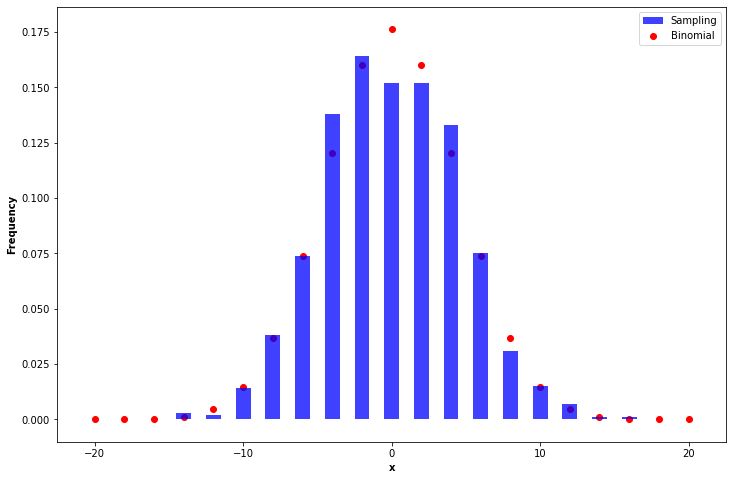

Figure 4.5 : Histogram of position X after 20 time steps. p= 0.5, n = 1000


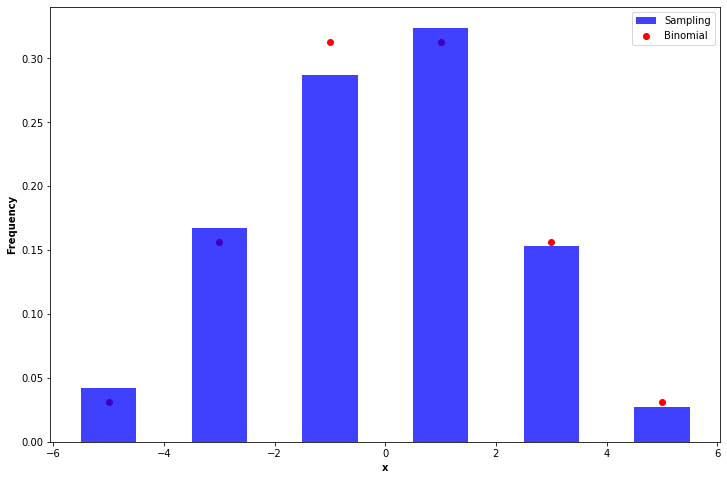

In [46]:
print('Figure 4.4 : Histogram of position X after 20 time steps. p= 0.5m n = 1000')
sample = final_pos_sampleRW(1000, 20, 1, x_0=0)
build_historgram_RW(sample, BinomialRW20, -20, 20, 1)

print('Figure 4.5 : Histogram of position X after 20 time steps. p= 0.5, n = 1000')
sample = final_pos_sampleRW(1000, 5, 1, x_0=0)
build_historgram_RW(sample, BinomialRW05, -5, 5, 1)

As expected we get a better agreement this time, especially at the 'tails' sections of the distributions, where the sample of size 100 had little or no representation.

b) We'll now consider biased walks, where we have in general $P(Y=1)=p, P(Y=-1)=1-p$. We proceed in a similar fashion as in a) but in this case we'll make us of a uniform floating point random number to decide the direction of each jump and of course we add the parameter $p$.

In [47]:
def bernoulliBiasedRW(steps,p,step_size,x_0=0):
    walk = [x_0]
    tosses = rn.random(steps) 
    for toss in tosses:
        if (toss < p):
            walk.append(walk[-1] + step_size)
        else:
            walk.append(walk[-1] - step_size)                
    return np.array(walk)

def generateBiasedRWs(n_walks,p, steps, step_size, x_0=0):
    return [bernoulliBiasedRW(steps,p ,step_size, x_0) for i in range(n_walks)]

def final_pos_sampleBiasedRW(n_walks,p , steps, step_size, x_0=0):
    
    result=[]
    for i in range(n_walks):
        result.append(bernoulliBiasedRW(steps,p,step_size,x_0)[-1])
    
    return np.array(result)

i) We want to plot 100 random paths up to $N=100$ time-steps $(i=0,1, \ldots, N)$ using $X_{0}=0$ and $p=0.2$



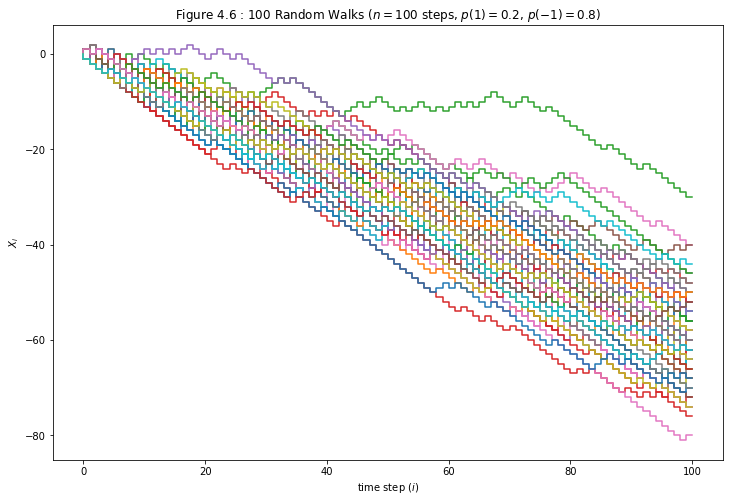

In [48]:
biasedWalks = generateBiasedRWs(100,0.2, 100, 1, x_0=0)

plt.figure(figsize=(12,8))
for walk in biasedWalks:
    plt.step(range(101),walk)

plt.xlabel("time step ($i$)")
plt.ylabel('$X_i$')
#plt.legend(loc = 'best')
plt.title("Figure 4.6 : 100 Random Walks ($n = 100$ steps, $p(1) = 0.2$, $p(-1) = 0.8$)")

plt.show()

We see that the bias towards the negative side drags all the walkers to a distribution centered at  $E_p(X_{100})= 100 (0.2(1) - 0.8(-1))= -60$

ii) We now want to generate a histogram of the position reached at time $i = 5$ for the biased randow walks.

Figure 4. : 


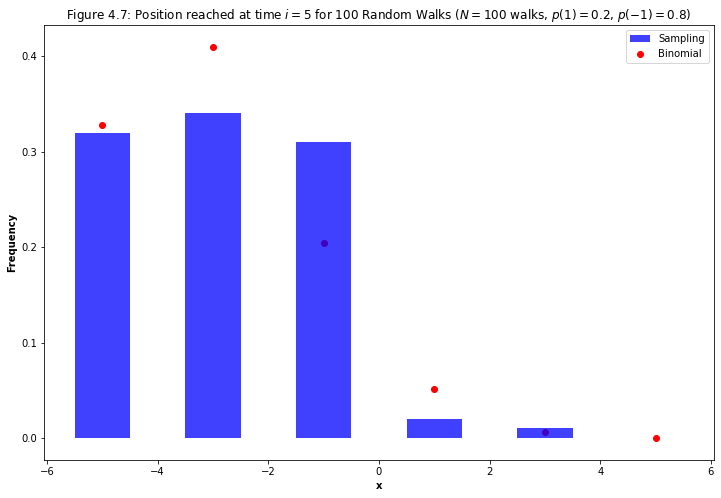

In [49]:

def BinomialRW5bias(x):
    return BinomialRW(5,x,0.2)

print('Figure 4. : ')
sample = final_pos_sampleBiasedRW(100,0.2, 5, 1, x_0=0)
build_historgram_RW(sample, BinomialRW5bias, -5, 5, 1,title='Figure 4.7: Position reached at time $i = 5$ for 100 Random Walks ($N = 100$ walks, $p(1) = 0.2$, $p(-1) = 0.8$)')




if we change $p$ we will affect the mean and the variance of the distribution:

$$E\left[X_{N}\right]=N(2p-1)$$

$$Var\left[X_{N}\right]=4Np(1-p)$$

We can illustrate this in the plot below. We get maximum variance and a centered mean for $p=1/2$, any departure from this value reduces the variance and displaces the mean towards the negative side for $p<1/2$ and the positive side for $p>1/2$. 

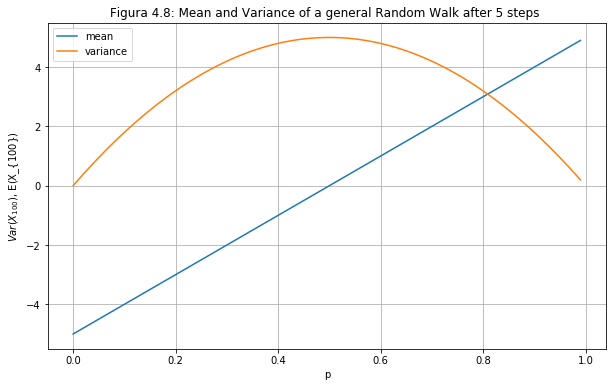

In [50]:
x = np.arange(0,1,0.01)

plt.figure(figsize=(10,6))
plt.plot(x,5*(2*x-1), label='mean')
plt.plot(x,4*5*(x*(1-x)), label='variance')
plt.legend()
plt.xlabel('p')
plt.ylabel('$Var(X_{100})$, E(X_{100})')
plt.title('Figura 4.8: Mean and Variance of a general Random Walk after 5 steps ')
plt.grid()
plt.show()



# References

[1] Lecture 6 - Thomas Prellberg - Topics in Scientific Computing - Queen Mary, University of London. 2019.

[2] Lecture 7 - Thomas Prellberg - Topics in Scientific Computing - Queen Mary, University of London. 2019.

[2] Lecture Week 8 - Thomas Prellberg - Topics in Scientific Computing - Queen Mary, University of London. 2019.

[3] Lecture Week 9 - Thomas Prellberg - Topics in Scientific Computing - Queen Mary, University of London. 2019. 